In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.utils import shuffle

history={'loss':[]}

# 1.初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    # 权重和偏置矩阵
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    # 通过字典存储参数
    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 2.前向传播
def forward_propagation(X, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # 通过前向传播来计算a2
    z1 = np.dot(w1, X) + b1     # 这个地方需注意矩阵加法：虽然(w1*X)和b1的维度不同，但可以相加
    a1 = np.tanh(z1)            # 使用tanh作为第一层的激活函数
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))  # 使用sigmoid作为第二层的激活函数

    # 通过字典存储参数
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}

    return a2, cache


# 3.计算代价函数
def compute_cost(a2, Y, parameters):
    m = Y.shape[1]      # Y的列数即为总的样本数

    # 采用交叉熵（cross-entropy）作为代价函数
    logprobs = np.multiply(np.log(a2), Y) + np.multiply((1 - Y), np.log(1 - a2))
    cost = - np.sum(logprobs) / m

    return cost


# 4.反向传播（计算代价函数的导数）
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]

    w2 = parameters['w2']

    a1 = cache['a1']
    a2 = cache['a2']

    # 反向传播，计算dw1、db1、dw2、db2
    dz2 = a2 - Y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

    return grads


# 5.更新参数
def update_parameters(parameters, grads, learning_rate=0.0075):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    # 更新参数
    w1 = w1 - dw1 * learning_rate
    b1 = b1 - db1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b2 = b2 - db2 * learning_rate

    parameters = {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

    return parameters


# 建立神经网络
def nn_model(X, Y, n_h, n_input, n_output, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    n_x = n_input           # 输入层节点数
    n_y = n_output          # 输出层节点数

    # 1.初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 梯度下降循环
    for i in range(0, num_iterations):
        # 2.前向传播
        a2, cache = forward_propagation(X, parameters)
        # 3.计算代价函数
        cost = compute_cost(a2, Y, parameters)
        # 4.反向传播
        grads = backward_propagation(parameters, cache, X, Y)
        # 5.更新参数
        parameters = update_parameters(parameters, grads)

        # 每1000次迭代，输出一次代价函数
        if print_cost and i % 1 == 0:
            print('迭代第%i次，代价函数为：%f' % (i, cost))
            history['loss'].append(cost)

    return parameters


# 对模型进行测试
def predict(parameters, x_test, y_test):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x_test) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # 结果的维度
    n_rows = y_test.shape[0]
    n_cols = y_test.shape[1]

    # 预测值结果存储
    output = np.empty(shape=(n_rows, n_cols), dtype=int)

    # 取出每条测试数据的预测结果
    for i in range(n_cols):
        # 将每条测试数据的预测结果（概率）存为一个行向量
        temp = np.zeros(shape=n_rows)
        for j in range(n_rows):
            temp[j] = a2[j][i]

        # 将每条结果（概率）从小到大排序，并获得相应下标
        sorted_dist = np.argsort(temp)
        length = len(sorted_dist)

        # 将概率最大的置为1，其它置为0
        for k in range(length):
            if k == sorted_dist[length - 1]:
                output[k][i] = 1
            else:
                output[k][i] = 0

    print('预测结果：')
    print(output)
    print('真实结果：')
    print(y_test)

    count = 0
    for k in range(0, n_cols):
        if output[0][k] == y_test[0][k] and output[1][k] == y_test[1][k] :
            count = count + 1

    acc = count / int(y_test.shape[1]) * 100
    print('准确率：%.2f%%' % acc)
    
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'r', label='loss')
    plt.title('Training loss')
    plt.xlabel('Times')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
df = pd.read_csv('data/hiber_train_zscore.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:3]
y_train=data[:,3]
y_train=y_train.astype(int)

df = pd.read_csv('data/hiber_test_zscore.csv', header = None)
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:3]
y_test=data[:,3]
y_test=y_test.astype(int)
y_train = tf.one_hot(y_train,2)
y_test = tf.one_hot(y_test,2)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

In [3]:
# 做了转置，将列转置为行
X_train=X_train.T 
X_test=X_test.T 
y_test=y_test.T 
y_train=y_train.T 

In [4]:
# 开始训练
start_time = datetime.datetime.now()
# 输入12个节点，隐层6个节点，输出3个节点，迭代10000次
parameters = nn_model(X_train, y_train, n_h=12, n_input=3, n_output=2, num_iterations=10000, print_cost=True)
end_time = datetime.datetime.now()
print("用时：" + str((end_time - start_time).seconds) + 's' + str(round((end_time - start_time).microseconds / 1000)) + 'ms')

迭代第0次，代价函数为：1.386239
迭代第1次，代价函数为：1.383950
迭代第2次，代价函数为：1.381670
迭代第3次，代价函数为：1.379399
迭代第4次，代价函数为：1.377135
迭代第5次，代价函数为：1.374881
迭代第6次，代价函数为：1.372635
迭代第7次，代价函数为：1.370397
迭代第8次，代价函数为：1.368168
迭代第9次，代价函数为：1.365947
迭代第10次，代价函数为：1.363734
迭代第11次，代价函数为：1.361530
迭代第12次，代价函数为：1.359333
迭代第13次，代价函数为：1.357146
迭代第14次，代价函数为：1.354966
迭代第15次，代价函数为：1.352794
迭代第16次，代价函数为：1.350631
迭代第17次，代价函数为：1.348476
迭代第18次，代价函数为：1.346329
迭代第19次，代价函数为：1.344189
迭代第20次，代价函数为：1.342058
迭代第21次，代价函数为：1.339935
迭代第22次，代价函数为：1.337820
迭代第23次，代价函数为：1.335713
迭代第24次，代价函数为：1.333613
迭代第25次，代价函数为：1.331522
迭代第26次，代价函数为：1.329438
迭代第27次，代价函数为：1.327362
迭代第28次，代价函数为：1.325294
迭代第29次，代价函数为：1.323233
迭代第30次，代价函数为：1.321180
迭代第31次，代价函数为：1.319135
迭代第32次，代价函数为：1.317098
迭代第33次，代价函数为：1.315068
迭代第34次，代价函数为：1.313046
迭代第35次，代价函数为：1.311031
迭代第36次，代价函数为：1.309024
迭代第37次，代价函数为：1.307024
迭代第38次，代价函数为：1.305032
迭代第39次，代价函数为：1.303048
迭代第40次，代价函数为：1.301070
迭代第41次，代价函数为：1.299100
迭代第42次，代价函数为：1.297138
迭代第43次，代价函数为：1.295182
迭代第44次，代价函数为：1.293234
迭代第45次，代价函数为：1.29129

迭代第414次，代价函数为：0.891916
迭代第415次，代价函数为：0.891356
迭代第416次，代价函数为：0.890798
迭代第417次，代价函数为：0.890241
迭代第418次，代价函数为：0.889686
迭代第419次，代价函数为：0.889133
迭代第420次，代价函数为：0.888581
迭代第421次，代价函数为：0.888031
迭代第422次，代价函数为：0.887482
迭代第423次，代价函数为：0.886935
迭代第424次，代价函数为：0.886390
迭代第425次，代价函数为：0.885846
迭代第426次，代价函数为：0.885304
迭代第427次，代价函数为：0.884763
迭代第428次，代价函数为：0.884224
迭代第429次，代价函数为：0.883686
迭代第430次，代价函数为：0.883150
迭代第431次，代价函数为：0.882616
迭代第432次，代价函数为：0.882083
迭代第433次，代价函数为：0.881551
迭代第434次，代价函数为：0.881021
迭代第435次，代价函数为：0.880493
迭代第436次，代价函数为：0.879966
迭代第437次，代价函数为：0.879440
迭代第438次，代价函数为：0.878916
迭代第439次，代价函数为：0.878394
迭代第440次，代价函数为：0.877873
迭代第441次，代价函数为：0.877354
迭代第442次，代价函数为：0.876836
迭代第443次，代价函数为：0.876319
迭代第444次，代价函数为：0.875804
迭代第445次，代价函数为：0.875290
迭代第446次，代价函数为：0.874778
迭代第447次，代价函数为：0.874267
迭代第448次，代价函数为：0.873758
迭代第449次，代价函数为：0.873250
迭代第450次，代价函数为：0.872744
迭代第451次，代价函数为：0.872239
迭代第452次，代价函数为：0.871736
迭代第453次，代价函数为：0.871233
迭代第454次，代价函数为：0.870733
迭代第455次，代价函数为：0.870233
迭代第456次，代价函数为：0.869735
迭代第457次，代价函

迭代第791次，代价函数为：0.758217
迭代第792次，代价函数为：0.757998
迭代第793次，代价函数为：0.757780
迭代第794次，代价函数为：0.757562
迭代第795次，代价函数为：0.757344
迭代第796次，代价函数为：0.757127
迭代第797次，代价函数为：0.756911
迭代第798次，代价函数为：0.756695
迭代第799次，代价函数为：0.756479
迭代第800次，代价函数为：0.756264
迭代第801次，代价函数为：0.756049
迭代第802次，代价函数为：0.755835
迭代第803次，代价函数为：0.755621
迭代第804次，代价函数为：0.755408
迭代第805次，代价函数为：0.755195
迭代第806次，代价函数为：0.754983
迭代第807次，代价函数为：0.754771
迭代第808次，代价函数为：0.754559
迭代第809次，代价函数为：0.754348
迭代第810次，代价函数为：0.754137
迭代第811次，代价函数为：0.753927
迭代第812次，代价函数为：0.753717
迭代第813次，代价函数为：0.753508
迭代第814次，代价函数为：0.753299
迭代第815次，代价函数为：0.753090
迭代第816次，代价函数为：0.752882
迭代第817次，代价函数为：0.752675
迭代第818次，代价函数为：0.752467
迭代第819次，代价函数为：0.752261
迭代第820次，代价函数为：0.752054
迭代第821次，代价函数为：0.751848
迭代第822次，代价函数为：0.751643
迭代第823次，代价函数为：0.751438
迭代第824次，代价函数为：0.751233
迭代第825次，代价函数为：0.751029
迭代第826次，代价函数为：0.750825
迭代第827次，代价函数为：0.750622
迭代第828次，代价函数为：0.750419
迭代第829次，代价函数为：0.750216
迭代第830次，代价函数为：0.750014
迭代第831次，代价函数为：0.749812
迭代第832次，代价函数为：0.749611
迭代第833次，代价函数为：0.749410
迭代第834次，代价函

迭代第1221次，代价函数为：0.693837
迭代第1222次，代价函数为：0.693735
迭代第1223次，代价函数为：0.693633
迭代第1224次，代价函数为：0.693531
迭代第1225次，代价函数为：0.693430
迭代第1226次，代价函数为：0.693328
迭代第1227次，代价函数为：0.693227
迭代第1228次，代价函数为：0.693126
迭代第1229次，代价函数为：0.693025
迭代第1230次，代价函数为：0.692924
迭代第1231次，代价函数为：0.692823
迭代第1232次，代价函数为：0.692722
迭代第1233次，代价函数为：0.692622
迭代第1234次，代价函数为：0.692522
迭代第1235次，代价函数为：0.692421
迭代第1236次，代价函数为：0.692321
迭代第1237次，代价函数为：0.692222
迭代第1238次，代价函数为：0.692122
迭代第1239次，代价函数为：0.692022
迭代第1240次，代价函数为：0.691923
迭代第1241次，代价函数为：0.691823
迭代第1242次，代价函数为：0.691724
迭代第1243次，代价函数为：0.691625
迭代第1244次，代价函数为：0.691526
迭代第1245次，代价函数为：0.691428
迭代第1246次，代价函数为：0.691329
迭代第1247次，代价函数为：0.691231
迭代第1248次，代价函数为：0.691132
迭代第1249次，代价函数为：0.691034
迭代第1250次，代价函数为：0.690936
迭代第1251次，代价函数为：0.690838
迭代第1252次，代价函数为：0.690741
迭代第1253次，代价函数为：0.690643
迭代第1254次，代价函数为：0.690545
迭代第1255次，代价函数为：0.690448
迭代第1256次，代价函数为：0.690351
迭代第1257次，代价函数为：0.690254
迭代第1258次，代价函数为：0.690157
迭代第1259次，代价函数为：0.690060
迭代第1260次，代价函数为：0.689963
迭代第1261次，代价函数为：0.689867
迭代第1262次，代价函数为：0

迭代第1583次，代价函数为：0.664405
迭代第1584次，代价函数为：0.664339
迭代第1585次，代价函数为：0.664274
迭代第1586次，代价函数为：0.664209
迭代第1587次，代价函数为：0.664143
迭代第1588次，代价函数为：0.664078
迭代第1589次，代价函数为：0.664013
迭代第1590次，代价函数为：0.663948
迭代第1591次，代价函数为：0.663883
迭代第1592次，代价函数为：0.663818
迭代第1593次，代价函数为：0.663754
迭代第1594次，代价函数为：0.663689
迭代第1595次，代价函数为：0.663624
迭代第1596次，代价函数为：0.663560
迭代第1597次，代价函数为：0.663495
迭代第1598次，代价函数为：0.663431
迭代第1599次，代价函数为：0.663366
迭代第1600次，代价函数为：0.663302
迭代第1601次，代价函数为：0.663237
迭代第1602次，代价函数为：0.663173
迭代第1603次，代价函数为：0.663109
迭代第1604次，代价函数为：0.663045
迭代第1605次，代价函数为：0.662981
迭代第1606次，代价函数为：0.662917
迭代第1607次，代价函数为：0.662853
迭代第1608次，代价函数为：0.662789
迭代第1609次，代价函数为：0.662725
迭代第1610次，代价函数为：0.662662
迭代第1611次，代价函数为：0.662598
迭代第1612次，代价函数为：0.662534
迭代第1613次，代价函数为：0.662471
迭代第1614次，代价函数为：0.662407
迭代第1615次，代价函数为：0.662344
迭代第1616次，代价函数为：0.662281
迭代第1617次，代价函数为：0.662217
迭代第1618次，代价函数为：0.662154
迭代第1619次，代价函数为：0.662091
迭代第1620次，代价函数为：0.662028
迭代第1621次，代价函数为：0.661965
迭代第1622次，代价函数为：0.661902
迭代第1623次，代价函数为：0.661839
迭代第1624次，代价函数为：0

迭代第1947次，代价函数为：0.643971
迭代第1948次，代价函数为：0.643922
迭代第1949次，代价函数为：0.643873
迭代第1950次，代价函数为：0.643824
迭代第1951次，代价函数为：0.643775
迭代第1952次，代价函数为：0.643726
迭代第1953次，代价函数为：0.643677
迭代第1954次，代价函数为：0.643628
迭代第1955次，代价函数为：0.643580
迭代第1956次，代价函数为：0.643531
迭代第1957次，代价函数为：0.643482
迭代第1958次，代价函数为：0.643433
迭代第1959次，代价函数为：0.643384
迭代第1960次，代价函数为：0.643336
迭代第1961次，代价函数为：0.643287
迭代第1962次，代价函数为：0.643238
迭代第1963次，代价函数为：0.643190
迭代第1964次，代价函数为：0.643141
迭代第1965次，代价函数为：0.643092
迭代第1966次，代价函数为：0.643044
迭代第1967次，代价函数为：0.642995
迭代第1968次，代价函数为：0.642947
迭代第1969次，代价函数为：0.642898
迭代第1970次，代价函数为：0.642850
迭代第1971次，代价函数为：0.642801
迭代第1972次，代价函数为：0.642753
迭代第1973次，代价函数为：0.642704
迭代第1974次，代价函数为：0.642656
迭代第1975次，代价函数为：0.642608
迭代第1976次，代价函数为：0.642559
迭代第1977次，代价函数为：0.642511
迭代第1978次，代价函数为：0.642463
迭代第1979次，代价函数为：0.642415
迭代第1980次，代价函数为：0.642366
迭代第1981次，代价函数为：0.642318
迭代第1982次，代价函数为：0.642270
迭代第1983次，代价函数为：0.642222
迭代第1984次，代价函数为：0.642174
迭代第1985次，代价函数为：0.642126
迭代第1986次，代价函数为：0.642078
迭代第1987次，代价函数为：0.642030
迭代第1988次，代价函数为：0

迭代第2369次，代价函数为：0.625060
迭代第2370次，代价函数为：0.625018
迭代第2371次，代价函数为：0.624976
迭代第2372次，代价函数为：0.624935
迭代第2373次，代价函数为：0.624893
迭代第2374次，代价函数为：0.624851
迭代第2375次，代价函数为：0.624809
迭代第2376次，代价函数为：0.624767
迭代第2377次，代价函数为：0.624725
迭代第2378次，代价函数为：0.624683
迭代第2379次，代价函数为：0.624642
迭代第2380次，代价函数为：0.624600
迭代第2381次，代价函数为：0.624558
迭代第2382次，代价函数为：0.624516
迭代第2383次，代价函数为：0.624474
迭代第2384次，代价函数为：0.624433
迭代第2385次，代价函数为：0.624391
迭代第2386次，代价函数为：0.624349
迭代第2387次，代价函数为：0.624307
迭代第2388次，代价函数为：0.624266
迭代第2389次，代价函数为：0.624224
迭代第2390次，代价函数为：0.624182
迭代第2391次，代价函数为：0.624140
迭代第2392次，代价函数为：0.624099
迭代第2393次，代价函数为：0.624057
迭代第2394次，代价函数为：0.624015
迭代第2395次，代价函数为：0.623974
迭代第2396次，代价函数为：0.623932
迭代第2397次，代价函数为：0.623890
迭代第2398次，代价函数为：0.623849
迭代第2399次，代价函数为：0.623807
迭代第2400次，代价函数为：0.623765
迭代第2401次，代价函数为：0.623724
迭代第2402次，代价函数为：0.623682
迭代第2403次，代价函数为：0.623640
迭代第2404次，代价函数为：0.623599
迭代第2405次，代价函数为：0.623557
迭代第2406次，代价函数为：0.623515
迭代第2407次，代价函数为：0.623474
迭代第2408次，代价函数为：0.623432
迭代第2409次，代价函数为：0.623391
迭代第2410次，代价函数为：0

迭代第2761次，代价函数为：0.609154
迭代第2762次，代价函数为：0.609115
迭代第2763次，代价函数为：0.609075
迭代第2764次，代价函数为：0.609036
迭代第2765次，代价函数为：0.608997
迭代第2766次，代价函数为：0.608957
迭代第2767次，代价函数为：0.608918
迭代第2768次，代价函数为：0.608878
迭代第2769次，代价函数为：0.608839
迭代第2770次，代价函数为：0.608800
迭代第2771次，代价函数为：0.608760
迭代第2772次，代价函数为：0.608721
迭代第2773次，代价函数为：0.608682
迭代第2774次，代价函数为：0.608642
迭代第2775次，代价函数为：0.608603
迭代第2776次，代价函数为：0.608564
迭代第2777次，代价函数为：0.608524
迭代第2778次，代价函数为：0.608485
迭代第2779次，代价函数为：0.608446
迭代第2780次，代价函数为：0.608406
迭代第2781次，代价函数为：0.608367
迭代第2782次，代价函数为：0.608328
迭代第2783次，代价函数为：0.608289
迭代第2784次，代价函数为：0.608249
迭代第2785次，代价函数为：0.608210
迭代第2786次，代价函数为：0.608171
迭代第2787次，代价函数为：0.608131
迭代第2788次，代价函数为：0.608092
迭代第2789次，代价函数为：0.608053
迭代第2790次，代价函数为：0.608014
迭代第2791次，代价函数为：0.607975
迭代第2792次，代价函数为：0.607935
迭代第2793次，代价函数为：0.607896
迭代第2794次，代价函数为：0.607857
迭代第2795次，代价函数为：0.607818
迭代第2796次，代价函数为：0.607778
迭代第2797次，代价函数为：0.607739
迭代第2798次，代价函数为：0.607700
迭代第2799次，代价函数为：0.607661
迭代第2800次，代价函数为：0.607622
迭代第2801次，代价函数为：0.607583
迭代第2802次，代价函数为：0

迭代第3103次，代价函数为：0.596132
迭代第3104次，代价函数为：0.596096
迭代第3105次，代价函数为：0.596059
迭代第3106次，代价函数为：0.596023
迭代第3107次，代价函数为：0.595987
迭代第3108次，代价函数为：0.595950
迭代第3109次，代价函数为：0.595914
迭代第3110次，代价函数为：0.595878
迭代第3111次，代价函数为：0.595841
迭代第3112次，代价函数为：0.595805
迭代第3113次，代价函数为：0.595769
迭代第3114次，代价函数为：0.595733
迭代第3115次，代价函数为：0.595696
迭代第3116次，代价函数为：0.595660
迭代第3117次，代价函数为：0.595624
迭代第3118次，代价函数为：0.595588
迭代第3119次，代价函数为：0.595551
迭代第3120次，代价函数为：0.595515
迭代第3121次，代价函数为：0.595479
迭代第3122次，代价函数为：0.595443
迭代第3123次，代价函数为：0.595407
迭代第3124次，代价函数为：0.595371
迭代第3125次，代价函数为：0.595335
迭代第3126次，代价函数为：0.595299
迭代第3127次，代价函数为：0.595262
迭代第3128次，代价函数为：0.595226
迭代第3129次，代价函数为：0.595190
迭代第3130次，代价函数为：0.595154
迭代第3131次，代价函数为：0.595118
迭代第3132次，代价函数为：0.595082
迭代第3133次，代价函数为：0.595046
迭代第3134次，代价函数为：0.595010
迭代第3135次，代价函数为：0.594974
迭代第3136次，代价函数为：0.594938
迭代第3137次，代价函数为：0.594902
迭代第3138次，代价函数为：0.594866
迭代第3139次，代价函数为：0.594830
迭代第3140次，代价函数为：0.594795
迭代第3141次，代价函数为：0.594759
迭代第3142次，代价函数为：0.594723
迭代第3143次，代价函数为：0.594687
迭代第3144次，代价函数为：0

迭代第3557次，代价函数为：0.581203
迭代第3558次，代价函数为：0.581174
迭代第3559次，代价函数为：0.581145
迭代第3560次，代价函数为：0.581116
迭代第3561次，代价函数为：0.581088
迭代第3562次，代价函数为：0.581059
迭代第3563次，代价函数为：0.581030
迭代第3564次，代价函数为：0.581001
迭代第3565次，代价函数为：0.580973
迭代第3566次，代价函数为：0.580944
迭代第3567次，代价函数为：0.580915
迭代第3568次，代价函数为：0.580887
迭代第3569次，代价函数为：0.580858
迭代第3570次，代价函数为：0.580830
迭代第3571次，代价函数为：0.580801
迭代第3572次，代价函数为：0.580773
迭代第3573次，代价函数为：0.580744
迭代第3574次，代价函数为：0.580716
迭代第3575次，代价函数为：0.580687
迭代第3576次，代价函数为：0.580659
迭代第3577次，代价函数为：0.580630
迭代第3578次，代价函数为：0.580602
迭代第3579次，代价函数为：0.580573
迭代第3580次，代价函数为：0.580545
迭代第3581次，代价函数为：0.580517
迭代第3582次，代价函数为：0.580488
迭代第3583次，代价函数为：0.580460
迭代第3584次，代价函数为：0.580432
迭代第3585次，代价函数为：0.580404
迭代第3586次，代价函数为：0.580375
迭代第3587次，代价函数为：0.580347
迭代第3588次，代价函数为：0.580319
迭代第3589次，代价函数为：0.580291
迭代第3590次，代价函数为：0.580263
迭代第3591次，代价函数为：0.580234
迭代第3592次，代价函数为：0.580206
迭代第3593次，代价函数为：0.580178
迭代第3594次，代价函数为：0.580150
迭代第3595次，代价函数为：0.580122
迭代第3596次，代价函数为：0.580094
迭代第3597次，代价函数为：0.580066
迭代第3598次，代价函数为：0

迭代第3930次，代价函数为：0.571837
迭代第3931次，代价函数为：0.571816
迭代第3932次，代价函数为：0.571794
迭代第3933次，代价函数为：0.571773
迭代第3934次，代价函数为：0.571751
迭代第3935次，代价函数为：0.571730
迭代第3936次，代价函数为：0.571709
迭代第3937次，代价函数为：0.571687
迭代第3938次，代价函数为：0.571666
迭代第3939次，代价函数为：0.571645
迭代第3940次，代价函数为：0.571623
迭代第3941次，代价函数为：0.571602
迭代第3942次，代价函数为：0.571581
迭代第3943次，代价函数为：0.571559
迭代第3944次，代价函数为：0.571538
迭代第3945次，代价函数为：0.571517
迭代第3946次，代价函数为：0.571496
迭代第3947次，代价函数为：0.571475
迭代第3948次，代价函数为：0.571454
迭代第3949次，代价函数为：0.571432
迭代第3950次，代价函数为：0.571411
迭代第3951次，代价函数为：0.571390
迭代第3952次，代价函数为：0.571369
迭代第3953次，代价函数为：0.571348
迭代第3954次，代价函数为：0.571327
迭代第3955次，代价函数为：0.571306
迭代第3956次，代价函数为：0.571285
迭代第3957次，代价函数为：0.571264
迭代第3958次，代价函数为：0.571243
迭代第3959次，代价函数为：0.571222
迭代第3960次，代价函数为：0.571201
迭代第3961次，代价函数为：0.571180
迭代第3962次，代价函数为：0.571159
迭代第3963次，代价函数为：0.571138
迭代第3964次，代价函数为：0.571118
迭代第3965次，代价函数为：0.571097
迭代第3966次，代价函数为：0.571076
迭代第3967次，代价函数为：0.571055
迭代第3968次，代价函数为：0.571034
迭代第3969次，代价函数为：0.571014
迭代第3970次，代价函数为：0.570993
迭代第3971次，代价函数为：0

迭代第4288次，代价函数为：0.565251
迭代第4289次，代价函数为：0.565236
迭代第4290次，代价函数为：0.565220
迭代第4291次，代价函数为：0.565204
迭代第4292次，代价函数为：0.565189
迭代第4293次，代价函数为：0.565173
迭代第4294次，代价函数为：0.565158
迭代第4295次，代价函数为：0.565142
迭代第4296次，代价函数为：0.565127
迭代第4297次，代价函数为：0.565111
迭代第4298次，代价函数为：0.565096
迭代第4299次，代价函数为：0.565080
迭代第4300次，代价函数为：0.565065
迭代第4301次，代价函数为：0.565049
迭代第4302次，代价函数为：0.565034
迭代第4303次，代价函数为：0.565019
迭代第4304次，代价函数为：0.565003
迭代第4305次，代价函数为：0.564988
迭代第4306次，代价函数为：0.564973
迭代第4307次，代价函数为：0.564957
迭代第4308次，代价函数为：0.564942
迭代第4309次，代价函数为：0.564927
迭代第4310次，代价函数为：0.564911
迭代第4311次，代价函数为：0.564896
迭代第4312次，代价函数为：0.564881
迭代第4313次，代价函数为：0.564865
迭代第4314次，代价函数为：0.564850
迭代第4315次，代价函数为：0.564835
迭代第4316次，代价函数为：0.564820
迭代第4317次，代价函数为：0.564805
迭代第4318次，代价函数为：0.564789
迭代第4319次，代价函数为：0.564774
迭代第4320次，代价函数为：0.564759
迭代第4321次，代价函数为：0.564744
迭代第4322次，代价函数为：0.564729
迭代第4323次，代价函数为：0.564714
迭代第4324次，代价函数为：0.564698
迭代第4325次，代价函数为：0.564683
迭代第4326次，代价函数为：0.564668
迭代第4327次，代价函数为：0.564653
迭代第4328次，代价函数为：0.564638
迭代第4329次，代价函数为：0

迭代第4679次，代价函数为：0.560079
迭代第4680次，代价函数为：0.560067
迭代第4681次，代价函数为：0.560056
迭代第4682次，代价函数为：0.560045
迭代第4683次，代价函数为：0.560034
迭代第4684次，代价函数为：0.560023
迭代第4685次，代价函数为：0.560012
迭代第4686次，代价函数为：0.560001
迭代第4687次，代价函数为：0.559989
迭代第4688次，代价函数为：0.559978
迭代第4689次，代价函数为：0.559967
迭代第4690次，代价函数为：0.559956
迭代第4691次，代价函数为：0.559945
迭代第4692次，代价函数为：0.559934
迭代第4693次，代价函数为：0.559923
迭代第4694次，代价函数为：0.559912
迭代第4695次，代价函数为：0.559901
迭代第4696次，代价函数为：0.559890
迭代第4697次，代价函数为：0.559879
迭代第4698次，代价函数为：0.559868
迭代第4699次，代价函数为：0.559857
迭代第4700次，代价函数为：0.559846
迭代第4701次，代价函数为：0.559835
迭代第4702次，代价函数为：0.559824
迭代第4703次，代价函数为：0.559813
迭代第4704次，代价函数为：0.559802
迭代第4705次，代价函数为：0.559791
迭代第4706次，代价函数为：0.559780
迭代第4707次，代价函数为：0.559769
迭代第4708次，代价函数为：0.559758
迭代第4709次，代价函数为：0.559747
迭代第4710次，代价函数为：0.559736
迭代第4711次，代价函数为：0.559725
迭代第4712次，代价函数为：0.559714
迭代第4713次，代价函数为：0.559703
迭代第4714次，代价函数为：0.559692
迭代第4715次，代价函数为：0.559681
迭代第4716次，代价函数为：0.559670
迭代第4717次，代价函数为：0.559660
迭代第4718次，代价函数为：0.559649
迭代第4719次，代价函数为：0.559638
迭代第4720次，代价函数为：0

迭代第5040次，代价函数为：0.556534
迭代第5041次，代价函数为：0.556525
迭代第5042次，代价函数为：0.556517
迭代第5043次，代价函数为：0.556508
迭代第5044次，代价函数为：0.556499
迭代第5045次，代价函数为：0.556491
迭代第5046次，代价函数为：0.556482
迭代第5047次，代价函数为：0.556474
迭代第5048次，代价函数为：0.556465
迭代第5049次，代价函数为：0.556456
迭代第5050次，代价函数为：0.556448
迭代第5051次，代价函数为：0.556439
迭代第5052次，代价函数为：0.556431
迭代第5053次，代价函数为：0.556422
迭代第5054次，代价函数为：0.556413
迭代第5055次，代价函数为：0.556405
迭代第5056次，代价函数为：0.556396
迭代第5057次，代价函数为：0.556388
迭代第5058次，代价函数为：0.556379
迭代第5059次，代价函数为：0.556371
迭代第5060次，代价函数为：0.556362
迭代第5061次，代价函数为：0.556354
迭代第5062次，代价函数为：0.556345
迭代第5063次，代价函数为：0.556337
迭代第5064次，代价函数为：0.556328
迭代第5065次，代价函数为：0.556320
迭代第5066次，代价函数为：0.556311
迭代第5067次，代价函数为：0.556303
迭代第5068次，代价函数为：0.556294
迭代第5069次，代价函数为：0.556286
迭代第5070次，代价函数为：0.556277
迭代第5071次，代价函数为：0.556269
迭代第5072次，代价函数为：0.556260
迭代第5073次，代价函数为：0.556252
迭代第5074次，代价函数为：0.556243
迭代第5075次，代价函数为：0.556235
迭代第5076次，代价函数为：0.556226
迭代第5077次，代价函数为：0.556218
迭代第5078次，代价函数为：0.556209
迭代第5079次，代价函数为：0.556201
迭代第5080次，代价函数为：0.556193
迭代第5081次，代价函数为：0

迭代第5407次，代价函数为：0.553682
迭代第5408次，代价函数为：0.553675
迭代第5409次，代价函数为：0.553668
迭代第5410次，代价函数为：0.553661
迭代第5411次，代价函数为：0.553654
迭代第5412次，代价函数为：0.553647
迭代第5413次，代价函数为：0.553640
迭代第5414次，代价函数为：0.553633
迭代第5415次，代价函数为：0.553626
迭代第5416次，代价函数为：0.553619
迭代第5417次，代价函数为：0.553612
迭代第5418次，代价函数为：0.553605
迭代第5419次，代价函数为：0.553598
迭代第5420次，代价函数为：0.553591
迭代第5421次，代价函数为：0.553584
迭代第5422次，代价函数为：0.553577
迭代第5423次，代价函数为：0.553570
迭代第5424次，代价函数为：0.553563
迭代第5425次，代价函数为：0.553556
迭代第5426次，代价函数为：0.553549
迭代第5427次，代价函数为：0.553542
迭代第5428次，代价函数为：0.553535
迭代第5429次，代价函数为：0.553528
迭代第5430次，代价函数为：0.553521
迭代第5431次，代价函数为：0.553514
迭代第5432次，代价函数为：0.553507
迭代第5433次，代价函数为：0.553500
迭代第5434次，代价函数为：0.553493
迭代第5435次，代价函数为：0.553486
迭代第5436次，代价函数为：0.553479
迭代第5437次，代价函数为：0.553473
迭代第5438次，代价函数为：0.553466
迭代第5439次，代价函数为：0.553459
迭代第5440次，代价函数为：0.553452
迭代第5441次，代价函数为：0.553445
迭代第5442次，代价函数为：0.553438
迭代第5443次，代价函数为：0.553431
迭代第5444次，代价函数为：0.553424
迭代第5445次，代价函数为：0.553417
迭代第5446次，代价函数为：0.553410
迭代第5447次，代价函数为：0.553404
迭代第5448次，代价函数为：0

迭代第5833次，代价函数为：0.550962
迭代第5834次，代价函数为：0.550956
迭代第5835次，代价函数为：0.550950
迭代第5836次，代价函数为：0.550944
迭代第5837次，代价函数为：0.550938
迭代第5838次，代价函数为：0.550933
迭代第5839次，代价函数为：0.550927
迭代第5840次，代价函数为：0.550921
迭代第5841次，代价函数为：0.550915
迭代第5842次，代价函数为：0.550909
迭代第5843次，代价函数为：0.550903
迭代第5844次，代价函数为：0.550898
迭代第5845次，代价函数为：0.550892
迭代第5846次，代价函数为：0.550886
迭代第5847次，代价函数为：0.550880
迭代第5848次，代价函数为：0.550874
迭代第5849次，代价函数为：0.550869
迭代第5850次，代价函数为：0.550863
迭代第5851次，代价函数为：0.550857
迭代第5852次，代价函数为：0.550851
迭代第5853次，代价函数为：0.550845
迭代第5854次，代价函数为：0.550840
迭代第5855次，代价函数为：0.550834
迭代第5856次，代价函数为：0.550828
迭代第5857次，代价函数为：0.550822
迭代第5858次，代价函数为：0.550816
迭代第5859次，代价函数为：0.550811
迭代第5860次，代价函数为：0.550805
迭代第5861次，代价函数为：0.550799
迭代第5862次，代价函数为：0.550793
迭代第5863次，代价函数为：0.550788
迭代第5864次，代价函数为：0.550782
迭代第5865次，代价函数为：0.550776
迭代第5866次，代价函数为：0.550770
迭代第5867次，代价函数为：0.550765
迭代第5868次，代价函数为：0.550759
迭代第5869次，代价函数为：0.550753
迭代第5870次，代价函数为：0.550747
迭代第5871次，代价函数为：0.550741
迭代第5872次，代价函数为：0.550736
迭代第5873次，代价函数为：0.550730
迭代第5874次，代价函数为：0

迭代第6232次，代价函数为：0.548789
迭代第6233次，代价函数为：0.548784
迭代第6234次，代价函数为：0.548779
迭代第6235次，代价函数为：0.548774
迭代第6236次，代价函数为：0.548769
迭代第6237次，代价函数为：0.548764
迭代第6238次，代价函数为：0.548759
迭代第6239次，代价函数为：0.548754
迭代第6240次，代价函数为：0.548749
迭代第6241次，代价函数为：0.548744
迭代第6242次，代价函数为：0.548738
迭代第6243次，代价函数为：0.548733
迭代第6244次，代价函数为：0.548728
迭代第6245次，代价函数为：0.548723
迭代第6246次，代价函数为：0.548718
迭代第6247次，代价函数为：0.548713
迭代第6248次，代价函数为：0.548708
迭代第6249次，代价函数为：0.548703
迭代第6250次，代价函数为：0.548698
迭代第6251次，代价函数为：0.548693
迭代第6252次，代价函数为：0.548688
迭代第6253次，代价函数为：0.548683
迭代第6254次，代价函数为：0.548678
迭代第6255次，代价函数为：0.548673
迭代第6256次，代价函数为：0.548667
迭代第6257次，代价函数为：0.548662
迭代第6258次，代价函数为：0.548657
迭代第6259次，代价函数为：0.548652
迭代第6260次，代价函数为：0.548647
迭代第6261次，代价函数为：0.548642
迭代第6262次，代价函数为：0.548637
迭代第6263次，代价函数为：0.548632
迭代第6264次，代价函数为：0.548627
迭代第6265次，代价函数为：0.548622
迭代第6266次，代价函数为：0.548617
迭代第6267次，代价函数为：0.548612
迭代第6268次，代价函数为：0.548607
迭代第6269次，代价函数为：0.548602
迭代第6270次，代价函数为：0.548597
迭代第6271次，代价函数为：0.548592
迭代第6272次，代价函数为：0.548587
迭代第6273次，代价函数为：0

迭代第6598次，代价函数为：0.547022
迭代第6599次，代价函数为：0.547018
迭代第6600次，代价函数为：0.547013
迭代第6601次，代价函数为：0.547009
迭代第6602次，代价函数为：0.547004
迭代第6603次，代价函数为：0.546999
迭代第6604次，代价函数为：0.546995
迭代第6605次，代价函数为：0.546990
迭代第6606次，代价函数为：0.546986
迭代第6607次，代价函数为：0.546981
迭代第6608次，代价函数为：0.546977
迭代第6609次，代价函数为：0.546972
迭代第6610次，代价函数为：0.546967
迭代第6611次，代价函数为：0.546963
迭代第6612次，代价函数为：0.546958
迭代第6613次，代价函数为：0.546954
迭代第6614次，代价函数为：0.546949
迭代第6615次，代价函数为：0.546945
迭代第6616次，代价函数为：0.546940
迭代第6617次，代价函数为：0.546935
迭代第6618次，代价函数为：0.546931
迭代第6619次，代价函数为：0.546926
迭代第6620次，代价函数为：0.546922
迭代第6621次，代价函数为：0.546917
迭代第6622次，代价函数为：0.546913
迭代第6623次，代价函数为：0.546908
迭代第6624次，代价函数为：0.546904
迭代第6625次，代价函数为：0.546899
迭代第6626次，代价函数为：0.546894
迭代第6627次，代价函数为：0.546890
迭代第6628次，代价函数为：0.546885
迭代第6629次，代价函数为：0.546881
迭代第6630次，代价函数为：0.546876
迭代第6631次，代价函数为：0.546872
迭代第6632次，代价函数为：0.546867
迭代第6633次，代价函数为：0.546863
迭代第6634次，代价函数为：0.546858
迭代第6635次，代价函数为：0.546854
迭代第6636次，代价函数为：0.546849
迭代第6637次，代价函数为：0.546845
迭代第6638次，代价函数为：0.546840
迭代第6639次，代价函数为：0

迭代第7047次，代价函数为：0.545080
迭代第7048次，代价函数为：0.545076
迭代第7049次，代价函数为：0.545072
迭代第7050次，代价函数为：0.545068
迭代第7051次，代价函数为：0.545064
迭代第7052次，代价函数为：0.545060
迭代第7053次，代价函数为：0.545056
迭代第7054次，代价函数为：0.545052
迭代第7055次，代价函数为：0.545048
迭代第7056次，代价函数为：0.545044
迭代第7057次，代价函数为：0.545040
迭代第7058次，代价函数为：0.545036
迭代第7059次，代价函数为：0.545031
迭代第7060次，代价函数为：0.545027
迭代第7061次，代价函数为：0.545023
迭代第7062次，代价函数为：0.545019
迭代第7063次，代价函数为：0.545015
迭代第7064次，代价函数为：0.545011
迭代第7065次，代价函数为：0.545007
迭代第7066次，代价函数为：0.545003
迭代第7067次，代价函数为：0.544999
迭代第7068次，代价函数为：0.544995
迭代第7069次，代价函数为：0.544991
迭代第7070次，代价函数为：0.544987
迭代第7071次，代价函数为：0.544983
迭代第7072次，代价函数为：0.544979
迭代第7073次，代价函数为：0.544975
迭代第7074次，代价函数为：0.544970
迭代第7075次，代价函数为：0.544966
迭代第7076次，代价函数为：0.544962
迭代第7077次，代价函数为：0.544958
迭代第7078次，代价函数为：0.544954
迭代第7079次，代价函数为：0.544950
迭代第7080次，代价函数为：0.544946
迭代第7081次，代价函数为：0.544942
迭代第7082次，代价函数为：0.544938
迭代第7083次，代价函数为：0.544934
迭代第7084次，代价函数为：0.544930
迭代第7085次，代价函数为：0.544926
迭代第7086次，代价函数为：0.544922
迭代第7087次，代价函数为：0.544918
迭代第7088次，代价函数为：0

迭代第7407次，代价函数为：0.543670
迭代第7408次，代价函数为：0.543667
迭代第7409次，代价函数为：0.543663
迭代第7410次，代价函数为：0.543659
迭代第7411次，代价函数为：0.543655
迭代第7412次，代价函数为：0.543652
迭代第7413次，代价函数为：0.543648
迭代第7414次，代价函数为：0.543644
迭代第7415次，代价函数为：0.543640
迭代第7416次，代价函数为：0.543637
迭代第7417次，代价函数为：0.543633
迭代第7418次，代价函数为：0.543629
迭代第7419次，代价函数为：0.543625
迭代第7420次，代价函数为：0.543622
迭代第7421次，代价函数为：0.543618
迭代第7422次，代价函数为：0.543614
迭代第7423次，代价函数为：0.543610
迭代第7424次，代价函数为：0.543607
迭代第7425次，代价函数为：0.543603
迭代第7426次，代价函数为：0.543599
迭代第7427次，代价函数为：0.543595
迭代第7428次，代价函数为：0.543592
迭代第7429次，代价函数为：0.543588
迭代第7430次，代价函数为：0.543584
迭代第7431次，代价函数为：0.543580
迭代第7432次，代价函数为：0.543577
迭代第7433次，代价函数为：0.543573
迭代第7434次，代价函数为：0.543569
迭代第7435次，代价函数为：0.543565
迭代第7436次，代价函数为：0.543562
迭代第7437次，代价函数为：0.543558
迭代第7438次，代价函数为：0.543554
迭代第7439次，代价函数为：0.543551
迭代第7440次，代价函数为：0.543547
迭代第7441次，代价函数为：0.543543
迭代第7442次，代价函数为：0.543539
迭代第7443次，代价函数为：0.543536
迭代第7444次，代价函数为：0.543532
迭代第7445次，代价函数为：0.543528
迭代第7446次，代价函数为：0.543524
迭代第7447次，代价函数为：0.543521
迭代第7448次，代价函数为：0

迭代第7765次，代价函数为：0.542378
迭代第7766次，代价函数为：0.542375
迭代第7767次，代价函数为：0.542371
迭代第7768次，代价函数为：0.542368
迭代第7769次，代价函数为：0.542364
迭代第7770次，代价函数为：0.542361
迭代第7771次，代价函数为：0.542357
迭代第7772次，代价函数为：0.542354
迭代第7773次，代价函数为：0.542350
迭代第7774次，代价函数为：0.542347
迭代第7775次，代价函数为：0.542343
迭代第7776次，代价函数为：0.542340
迭代第7777次，代价函数为：0.542336
迭代第7778次，代价函数为：0.542333
迭代第7779次，代价函数为：0.542329
迭代第7780次，代价函数为：0.542326
迭代第7781次，代价函数为：0.542323
迭代第7782次，代价函数为：0.542319
迭代第7783次，代价函数为：0.542316
迭代第7784次，代价函数为：0.542312
迭代第7785次，代价函数为：0.542309
迭代第7786次，代价函数为：0.542305
迭代第7787次，代价函数为：0.542302
迭代第7788次，代价函数为：0.542298
迭代第7789次，代价函数为：0.542295
迭代第7790次，代价函数为：0.542291
迭代第7791次，代价函数为：0.542288
迭代第7792次，代价函数为：0.542285
迭代第7793次，代价函数为：0.542281
迭代第7794次，代价函数为：0.542278
迭代第7795次，代价函数为：0.542274
迭代第7796次，代价函数为：0.542271
迭代第7797次，代价函数为：0.542267
迭代第7798次，代价函数为：0.542264
迭代第7799次，代价函数为：0.542260
迭代第7800次，代价函数为：0.542257
迭代第7801次，代价函数为：0.542254
迭代第7802次，代价函数为：0.542250
迭代第7803次，代价函数为：0.542247
迭代第7804次，代价函数为：0.542243
迭代第7805次，代价函数为：0.542240
迭代第7806次，代价函数为：0

迭代第8202次，代价函数为：0.540930
迭代第8203次，代价函数为：0.540927
迭代第8204次，代价函数为：0.540923
迭代第8205次，代价函数为：0.540920
迭代第8206次，代价函数为：0.540917
迭代第8207次，代价函数为：0.540914
迭代第8208次，代价函数为：0.540911
迭代第8209次，代价函数为：0.540908
迭代第8210次，代价函数为：0.540904
迭代第8211次，代价函数为：0.540901
迭代第8212次，代价函数为：0.540898
迭代第8213次，代价函数为：0.540895
迭代第8214次，代价函数为：0.540892
迭代第8215次，代价函数为：0.540889
迭代第8216次，代价函数为：0.540885
迭代第8217次，代价函数为：0.540882
迭代第8218次，代价函数为：0.540879
迭代第8219次，代价函数为：0.540876
迭代第8220次，代价函数为：0.540873
迭代第8221次，代价函数为：0.540870
迭代第8222次，代价函数为：0.540867
迭代第8223次，代价函数为：0.540863
迭代第8224次，代价函数为：0.540860
迭代第8225次，代价函数为：0.540857
迭代第8226次，代价函数为：0.540854
迭代第8227次，代价函数为：0.540851
迭代第8228次，代价函数为：0.540848
迭代第8229次，代价函数为：0.540844
迭代第8230次，代价函数为：0.540841
迭代第8231次，代价函数为：0.540838
迭代第8232次，代价函数为：0.540835
迭代第8233次，代价函数为：0.540832
迭代第8234次，代价函数为：0.540829
迭代第8235次，代价函数为：0.540826
迭代第8236次，代价函数为：0.540822
迭代第8237次，代价函数为：0.540819
迭代第8238次，代价函数为：0.540816
迭代第8239次，代价函数为：0.540813
迭代第8240次，代价函数为：0.540810
迭代第8241次，代价函数为：0.540807
迭代第8242次，代价函数为：0.540804
迭代第8243次，代价函数为：0

迭代第8596次，代价函数为：0.539731
迭代第8597次，代价函数为：0.539728
迭代第8598次，代价函数为：0.539725
迭代第8599次，代价函数为：0.539722
迭代第8600次，代价函数为：0.539719
迭代第8601次，代价函数为：0.539716
迭代第8602次，代价函数为：0.539714
迭代第8603次，代价函数为：0.539711
迭代第8604次，代价函数为：0.539708
迭代第8605次，代价函数为：0.539705
迭代第8606次，代价函数为：0.539702
迭代第8607次，代价函数为：0.539699
迭代第8608次，代价函数为：0.539696
迭代第8609次，代价函数为：0.539693
迭代第8610次，代价函数为：0.539690
迭代第8611次，代价函数为：0.539687
迭代第8612次，代价函数为：0.539684
迭代第8613次，代价函数为：0.539681
迭代第8614次，代价函数为：0.539679
迭代第8615次，代价函数为：0.539676
迭代第8616次，代价函数为：0.539673
迭代第8617次，代价函数为：0.539670
迭代第8618次，代价函数为：0.539667
迭代第8619次，代价函数为：0.539664
迭代第8620次，代价函数为：0.539661
迭代第8621次，代价函数为：0.539658
迭代第8622次，代价函数为：0.539655
迭代第8623次，代价函数为：0.539652
迭代第8624次，代价函数为：0.539649
迭代第8625次，代价函数为：0.539647
迭代第8626次，代价函数为：0.539644
迭代第8627次，代价函数为：0.539641
迭代第8628次，代价函数为：0.539638
迭代第8629次，代价函数为：0.539635
迭代第8630次，代价函数为：0.539632
迭代第8631次，代价函数为：0.539629
迭代第8632次，代价函数为：0.539626
迭代第8633次，代价函数为：0.539623
迭代第8634次，代价函数为：0.539620
迭代第8635次，代价函数为：0.539617
迭代第8636次，代价函数为：0.539615
迭代第8637次，代价函数为：0

迭代第9009次，代价函数为：0.538571
迭代第9010次，代价函数为：0.538568
迭代第9011次，代价函数为：0.538566
迭代第9012次，代价函数为：0.538563
迭代第9013次，代价函数为：0.538560
迭代第9014次，代价函数为：0.538558
迭代第9015次，代价函数为：0.538555
迭代第9016次，代价函数为：0.538552
迭代第9017次，代价函数为：0.538549
迭代第9018次，代价函数为：0.538547
迭代第9019次，代价函数为：0.538544
迭代第9020次，代价函数为：0.538541
迭代第9021次，代价函数为：0.538539
迭代第9022次，代价函数为：0.538536
迭代第9023次，代价函数为：0.538533
迭代第9024次，代价函数为：0.538531
迭代第9025次，代价函数为：0.538528
迭代第9026次，代价函数为：0.538525
迭代第9027次，代价函数为：0.538523
迭代第9028次，代价函数为：0.538520
迭代第9029次，代价函数为：0.538517
迭代第9030次，代价函数为：0.538515
迭代第9031次，代价函数为：0.538512
迭代第9032次，代价函数为：0.538509
迭代第9033次，代价函数为：0.538506
迭代第9034次，代价函数为：0.538504
迭代第9035次，代价函数为：0.538501
迭代第9036次，代价函数为：0.538498
迭代第9037次，代价函数为：0.538496
迭代第9038次，代价函数为：0.538493
迭代第9039次，代价函数为：0.538490
迭代第9040次，代价函数为：0.538488
迭代第9041次，代价函数为：0.538485
迭代第9042次，代价函数为：0.538482
迭代第9043次，代价函数为：0.538480
迭代第9044次，代价函数为：0.538477
迭代第9045次，代价函数为：0.538474
迭代第9046次，代价函数为：0.538472
迭代第9047次，代价函数为：0.538469
迭代第9048次，代价函数为：0.538466
迭代第9049次，代价函数为：0.538464
迭代第9050次，代价函数为：0

迭代第9362次，代价函数为：0.537650
迭代第9363次，代价函数为：0.537647
迭代第9364次，代价函数为：0.537645
迭代第9365次，代价函数为：0.537642
迭代第9366次，代价函数为：0.537640
迭代第9367次，代价函数为：0.537637
迭代第9368次，代价函数为：0.537635
迭代第9369次，代价函数为：0.537632
迭代第9370次，代价函数为：0.537630
迭代第9371次，代价函数为：0.537627
迭代第9372次，代价函数为：0.537625
迭代第9373次，代价函数为：0.537622
迭代第9374次，代价函数为：0.537620
迭代第9375次，代价函数为：0.537617
迭代第9376次，代价函数为：0.537614
迭代第9377次，代价函数为：0.537612
迭代第9378次，代价函数为：0.537609
迭代第9379次，代价函数为：0.537607
迭代第9380次，代价函数为：0.537604
迭代第9381次，代价函数为：0.537602
迭代第9382次，代价函数为：0.537599
迭代第9383次，代价函数为：0.537597
迭代第9384次，代价函数为：0.537594
迭代第9385次，代价函数为：0.537592
迭代第9386次，代价函数为：0.537589
迭代第9387次，代价函数为：0.537587
迭代第9388次，代价函数为：0.537584
迭代第9389次，代价函数为：0.537582
迭代第9390次，代价函数为：0.537579
迭代第9391次，代价函数为：0.537577
迭代第9392次，代价函数为：0.537574
迭代第9393次，代价函数为：0.537572
迭代第9394次，代价函数为：0.537569
迭代第9395次，代价函数为：0.537567
迭代第9396次，代价函数为：0.537564
迭代第9397次，代价函数为：0.537562
迭代第9398次，代价函数为：0.537559
迭代第9399次，代价函数为：0.537557
迭代第9400次，代价函数为：0.537554
迭代第9401次，代价函数为：0.537552
迭代第9402次，代价函数为：0.537549
迭代第9403次，代价函数为：0

迭代第9748次，代价函数为：0.536709
迭代第9749次，代价函数为：0.536707
迭代第9750次，代价函数为：0.536705
迭代第9751次，代价函数为：0.536702
迭代第9752次，代价函数为：0.536700
迭代第9753次，代价函数为：0.536698
迭代第9754次，代价函数为：0.536695
迭代第9755次，代价函数为：0.536693
迭代第9756次，代价函数为：0.536691
迭代第9757次，代价函数为：0.536688
迭代第9758次，代价函数为：0.536686
迭代第9759次，代价函数为：0.536683
迭代第9760次，代价函数为：0.536681
迭代第9761次，代价函数为：0.536679
迭代第9762次，代价函数为：0.536676
迭代第9763次，代价函数为：0.536674
迭代第9764次，代价函数为：0.536672
迭代第9765次，代价函数为：0.536669
迭代第9766次，代价函数为：0.536667
迭代第9767次，代价函数为：0.536665
迭代第9768次，代价函数为：0.536662
迭代第9769次，代价函数为：0.536660
迭代第9770次，代价函数为：0.536658
迭代第9771次，代价函数为：0.536655
迭代第9772次，代价函数为：0.536653
迭代第9773次，代价函数为：0.536651
迭代第9774次，代价函数为：0.536648
迭代第9775次，代价函数为：0.536646
迭代第9776次，代价函数为：0.536644
迭代第9777次，代价函数为：0.536641
迭代第9778次，代价函数为：0.536639
迭代第9779次，代价函数为：0.536637
迭代第9780次，代价函数为：0.536634
迭代第9781次，代价函数为：0.536632
迭代第9782次，代价函数为：0.536630
迭代第9783次，代价函数为：0.536627
迭代第9784次，代价函数为：0.536625
迭代第9785次，代价函数为：0.536623
迭代第9786次，代价函数为：0.536620
迭代第9787次，代价函数为：0.536618
迭代第9788次，代价函数为：0.536616
迭代第9789次，代价函数为：0

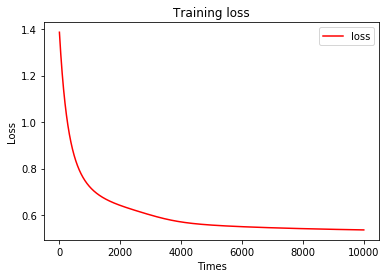

预测结果：
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
真实结果：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
准确率：73.77%


In [5]:
# 对模型进行测试
drow(history)
predict(parameters, X_test, y_test)